# Google Play Store Data Analysis

Source: https://www.kaggle.com/datasets/lava18/google-play-store-apps       (edited)

### 1. Data Cleaning

Import the libraries

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("googleplaystore.csv")
review_data = pd.read_csv("googleplaystore_user_reviews.csv")   #won't be used yet

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data = pd.DataFrame(data)
  
data.drop_duplicates(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
data.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Seems like there is too much null data for Rating <br>

For Current and Android Versions we can simply fill the version data with 0s -because we are not going to use them

Before filling let's check nulls for Android Ver since it is the last column of the dataset and there can be some faulty data 

In [7]:
data[data['Android Ver'].isnull()] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Let's drop row 10472 since we don't have the category for it

In [8]:
data = data.drop(10472)                 #We could simply insert the Category by checking Google Play Store by hand 
data[data['Android Ver'].isnull()]      #I prefered simply dropping the row

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


Let's check the Current Version nulls too

In [9]:
data[data['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


Null rows in Current Version looks okay so we can simply fill them 

Fill the null values for the Current and Android Versions with 0s <br>


In [10]:
data[data['Current Ver'].isnull()] = data[data['Current Ver'].isnull()].fillna({'Current Ver': 0})
data[data['Android Ver'].isnull()] = data[data['Android Ver'].isnull()].fillna({'Android Ver': 0})

We solved the null problem for Versions

In [11]:
data.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [12]:
data[data['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


Looks like it has 0 as Price so it is a free application

In [13]:
#to make it only fill the Type
data[data['App'] == 'Command & Conquer: Rivals'] = data[data['App'] == 'Command & Conquer: Rivals'].fillna({'Type': 'Free'})

We fixed Type for this row

In [14]:
data[data['App'] == 'Command & Conquer: Rivals']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,Free,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [15]:
data.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

Fill the Rating data using the mean for each Category

In [16]:
data['Rating'] = data['Rating'].fillna(data.groupby('Category')['Rating'].transform('mean'))

In [17]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

We filled every Null data

Let's enumerate Installs by their respective classes

In [18]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [19]:
install_dict = {'0': 0, '0+': 1, '1+': 2, '5+': 3, '10+': 4, '50+': 5, '100+': 6, 
                '500+': 7, '1,000+': 8, '5,000+': 9, '10,000+': 10, '50,000+': 11, 
                '100,000+': 12, '500,000+': 13, '1,000,000+': 14, '5,000,000+': 15,
                '10,000,000+': 16, '50,000,000+': 17, '100,000,000+': 18, 
                '500,000,000+': 19, '1,000,000,000+': 20}

In [20]:
def process_installs(install_val):
    return install_dict[install_val]

Enumerated the install values

In [21]:
data['Installs_Processed'] = data['Installs'].apply(process_installs)

In [22]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_Processed
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,13
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,15
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,17
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,12


Now Installs are processed and can be used, <br> <br>

Next we have to make all sizes megabytes -i have converted kilobytes to mb- 

In [23]:
def convert_size_to_mb(size_str):
    # Extract the numeric value and unit from the size string

    if size_str == 'Varies with device':
        return size_str
    
    size = float(size_str[:-1])
    unit = size_str[-1]
    
    # Convert the size to megabytes
    if unit == 'M':
        size_mb = size
    elif unit == 'K':
        size_mb = size / 1024
    else:
        size_mb = 0
        
    return size_mb

Now we create Size_Processed as Megabytes 

In [24]:
data['Size_Processed'] = data['Size'].apply(convert_size_to_mb)

Fixing Prices

In [25]:
data.loc[data.Price.str.startswith('$'), 'Price'] = data[data.Price.str.startswith('$')].Price.str[1:]
data.Price = data.Price.astype(float)

Fixing data types

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   App                 10357 non-null  object 
 1   Category            10357 non-null  object 
 2   Rating              10357 non-null  float64
 3   Reviews             10357 non-null  object 
 4   Size                10357 non-null  object 
 5   Installs            10357 non-null  object 
 6   Type                10357 non-null  object 
 7   Price               10357 non-null  float64
 8   Content Rating      10357 non-null  object 
 9   Genres              10357 non-null  object 
 10  Last Updated        10357 non-null  object 
 11  Current Ver         10357 non-null  object 
 12  Android Ver         10357 non-null  object 
 13  Installs_Processed  10357 non-null  int64  
 14  Size_Processed      10357 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 1.3

To keep memory usage minimum we assign proper data types

In [27]:
data.App = data.App.astype(str)
data.Category = data.Category.astype(str)
data.Rating = data.Rating.astype('float32')
data.Reviews = data.Reviews.astype('uintc')
data.Size = data.Size.astype(str)
data.Installs = data.Installs.astype(str)
data.Type = data.Type.astype(str)
data.Price = data.Price.astype('float32')
data['Content Rating'] = data['Content Rating'].astype(str)
data.Genres = data.Genres.astype(str)
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
data.Installs_Processed = data.Installs_Processed.astype('ubyte')


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   App                 10357 non-null  object        
 1   Category            10357 non-null  object        
 2   Rating              10357 non-null  float32       
 3   Reviews             10357 non-null  uint32        
 4   Size                10357 non-null  object        
 5   Installs            10357 non-null  object        
 6   Type                10357 non-null  object        
 7   Price               10357 non-null  float32       
 8   Content Rating      10357 non-null  object        
 9   Genres              10357 non-null  object        
 10  Last Updated        10357 non-null  datetime64[ns]
 11  Current Ver         10357 non-null  object        
 12  Android Ver         10357 non-null  object        
 13  Installs_Processed  10357 non-null  uint8     

## Extra Task
Find top (random) 3 installed apps

In [29]:
df_sorted = data.sort_values('Installs_Processed', ascending= False)
top_3_row = df_sorted.nlargest(3, 'Installs_Processed')
top_3_row

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_Processed,Size_Processed
341,Hangouts,COMMUNICATION,4.0,3419249,Varies with device,"1,000,000,000+",Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device,20,Varies with device
3928,YouTube,VIDEO_PLAYERS,4.3,25623548,Varies with device,"1,000,000,000+",Free,0.0,Teen,Video Players & Editors,2018-08-02,Varies with device,Varies with device,20,Varies with device
451,Gmail,COMMUNICATION,4.3,4604483,Varies with device,"1,000,000,000+",Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device,20,Varies with device


### Extra

For top installment level which Categories occur the most

In [30]:
pie_data = (data[data['Installs_Processed'] == 20].groupby('Category')['Rating'].count()).sort_values(ascending=False)
pie_data

Category
COMMUNICATION          14
SOCIAL                  7
GAME                    5
TRAVEL_AND_LOCAL        5
PHOTOGRAPHY             4
NEWS_AND_MAGAZINES      3
PRODUCTIVITY            3
VIDEO_PLAYERS           3
TOOLS                   2
BOOKS_AND_REFERENCE     1
ENTERTAINMENT           1
FAMILY                  1
Name: Rating, dtype: int64

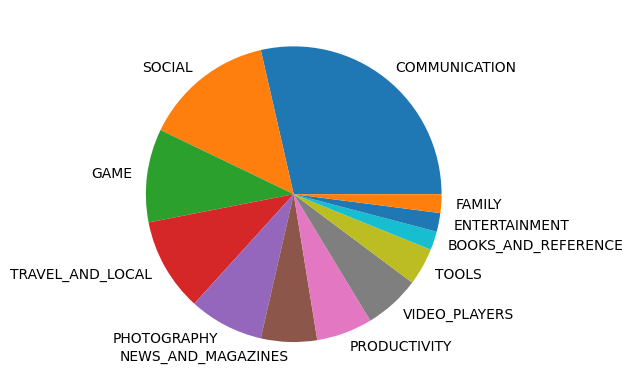

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
_ = ax.pie(pie_data, labels = pie_data.index)
